In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import numpy as np

In [4]:
pubg=pd.read_csv("train_V2.csv")
pubg.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


(array([2.396689e+06, 7.344500e+05, 6.520030e+05, 4.557990e+05,
        1.558330e+05, 3.829500e+04, 8.643000e+03, 2.644000e+03,
        1.307000e+03, 6.500000e+02, 3.060000e+02, 1.790000e+02,
        8.600000e+01, 3.400000e+01, 2.700000e+01, 1.400000e+01,
        3.000000e+00, 2.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([    0.        ,   859.33333333,  1718.66666667,  2578.        ,
         3437.33333333,  4296.66666667,  5156.        ,  6015.33333333,
         6874.66666667,  7734.        ,  8593.33333333,  9452.66666667,
        10312.        , 11171.33333333, 12030.66666667, 12890.        ,
        13749.33333333, 14608.66666667, 15468.        , 16327.33333333,
        17186.66666667, 18046.        , 18905.33333333, 19764.66666667,
        20624.        , 21483.33333333, 22342.66666667, 23202.        ,
        24

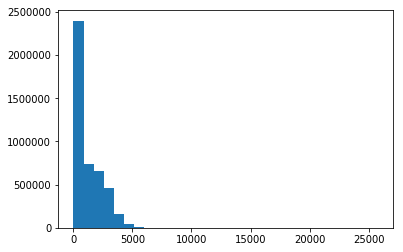

In [6]:
plt.hist(pubg["walkDistance"],bins=30)

# to observe correlation between walk distance and chances of winning

Text(0, 0.5, 'winPlacePerc')

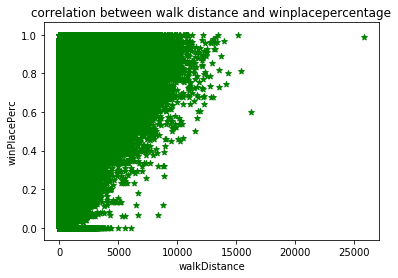

In [14]:
x=pubg["walkDistance"]
y=pubg["winPlacePerc"]
plt.scatter(x,y,c="g",marker="*")
plt.title("correlation between walk distance and winplacepercentage")
plt.xlabel("walkDistance")
plt.ylabel("winPlacePerc")

positive correlation was observed between walk distance (travelled by a player) and Chances of winning increased

# Number of Enemies Knocked out  vs  Heals

Text(0, 0.5, 'Healed')

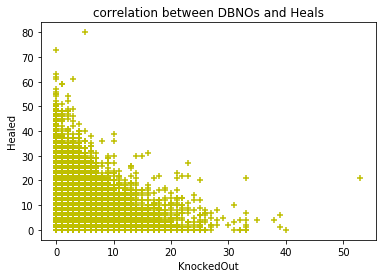

In [15]:
x1=pubg["DBNOs"]
y1=pubg["heals"]
plt.scatter(x1,y1,c="y",marker="+")
plt.title("correlation between DBNOs and Heals")
plt.xlabel("KnockedOut")
plt.ylabel("Healed")

Negative Correlation between Number of Times a player got Knockedout vs Number of Heals taken.
As the number of Knockouts increased Healing rate Decreased.

# damage dealt vs winning probability

Text(0, 0.5, 'Winning percentage')

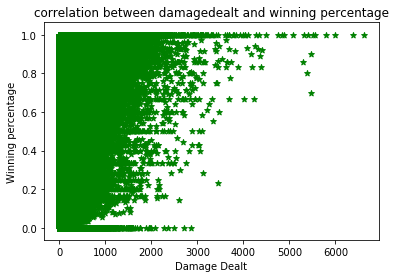

In [18]:
x3=pubg["damageDealt"]
y3=pubg["winPlacePerc"]
plt.scatter(x3,y3,c="g",marker="*")
plt.title("correlation between damagedealt and winning percentage")
plt.xlabel("Damage Dealt")
plt.ylabel("Winning percentage")

More the Damage a player is able to take and still survive increases the players probability of Winning

# boosts vs walk distance


Text(0, 0.5, 'Damage Dealt')

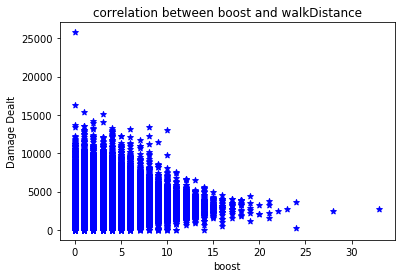

In [20]:
x5=pubg["boosts"]
y5=pubg["walkDistance"]
plt.scatter(x5,y5,c="b",marker="*")
plt.title("correlation between boost and walkDistance")
plt.xlabel("boost")
plt.ylabel("WalkDistance")

In [ ]:
Players who took more boosts didnt walk long distance, but used boost to survive on the battle ground

# boost vs winning percentage

Text(0, 0.5, 'winPlacePerc')

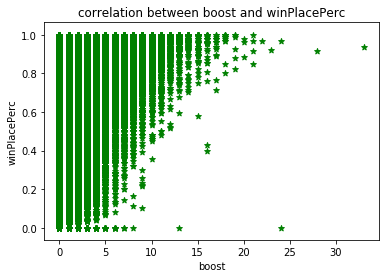

In [21]:
x6=pubg["boosts"]
y6=pubg["winPlacePerc"]
plt.scatter(x6,y6,c="g",marker="*")
plt.title("correlation between boost and winPlacePerc")
plt.xlabel("boost")
plt.ylabel("winPlacePerc")

# number of boosts showed increased probability of surviving for long time

# Effect of boosts on winning pecrentage
#boxplot showing number of boosts and showing winning percentages accordingly

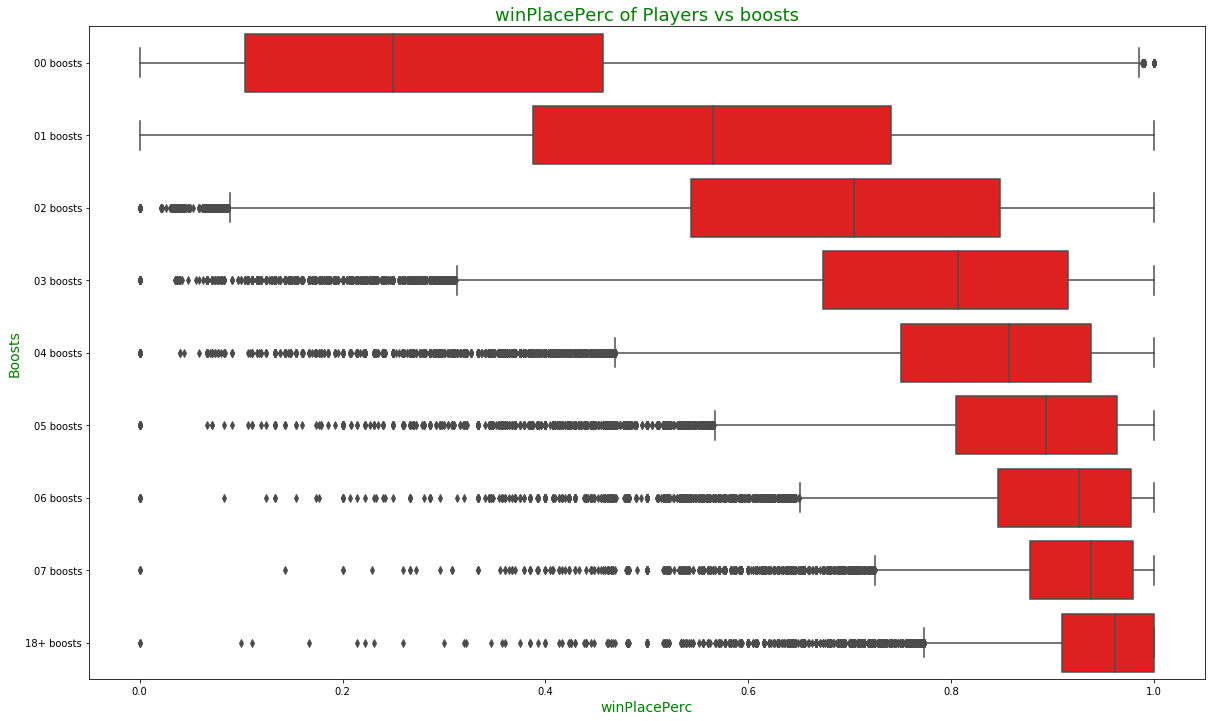

In [11]:
data = pubg[['boosts','winPlacePerc']].copy()
data.loc[data['boosts'] > data['boosts'].quantile(0.99), 'boosts'] = '18+'
data['boosts'] = data.boosts.apply(lambda x: '0' + str(x) if isinstance(x,int) and x<10 else x) 
data['boosts'] = data['boosts'].map(str) + " boosts"
x_order = data.groupby('boosts').mean().reset_index()['boosts']

fig, ax = plt.subplots(figsize=(20,12))
a = sns.boxplot(x='winPlacePerc', y='boosts', data=data, ax=ax, color="r", order=x_order)
ax.set_ylabel('Boosts', size=14, color="g")
ax.set_xlabel('winPlacePerc', size=14, color="g")
ax.set_title('winPlacePerc of Players vs boosts', size=18, color="g")
plt.show()

As the number of boosts taken by player crossed 3 total boosts exponentially increased the chances of winning

# weapons acquired vs winplacepercent

Text(0, 0.5, 'winPlacePerc')

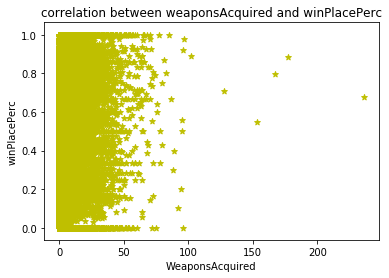

In [22]:
x7=pubg["weaponsAcquired"]
y7=pubg["winPlacePerc"]
plt.scatter(x7,y7,c="y",marker="*")
plt.title("correlation between weaponsAcquired and winPlacePerc")
plt.xlabel("WeaponsAcquired")
plt.ylabel("winPlacePerc")

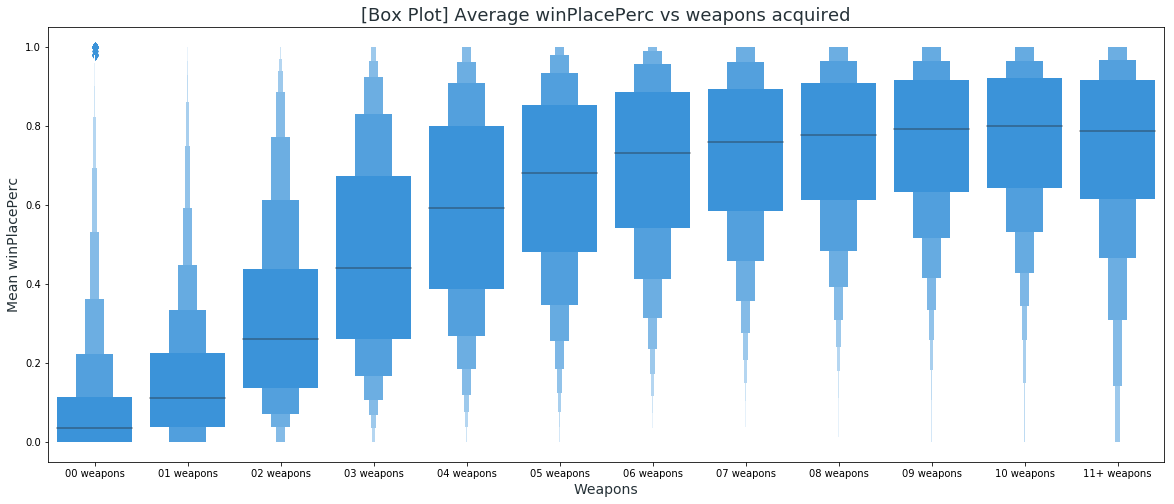

In [7]:
weapons = pubg[['weaponsAcquired','winPlacePerc']].copy()
weapons.loc[weapons['weaponsAcquired'] > weapons['weaponsAcquired'].quantile(0.99), 'weaponsAcquired'] = '11+'
weapons['weaponsAcquired'] = weapons.weaponsAcquired.apply(lambda x: '0' + str(x) if isinstance(x,int) and x<10 else x) 
weapons['weaponsAcquired'] = weapons['weaponsAcquired'].map(str) + " weapons"
x_order = weapons.groupby('weaponsAcquired').mean().reset_index()['weaponsAcquired']

fig, ax = plt.subplots(figsize=(20,8))
a = sns.boxenplot(x='weaponsAcquired', y='winPlacePerc', data=weapons, ax=ax, color="#2196F3", order=x_order)
ax.set_xlabel('Weapons', size=14, color="#263238")
ax.set_ylabel('Mean winPlacePerc', size=14, color="#263238")
ax.set_title('[Box Plot] Average winPlacePerc vs weapons acquired', size=18, color="#263238")
plt.show()

As the Weapons acquired by player increased the winning percentage was observed to be higher , but after the threshold of 10 weapons a slight dip was seen in probability of winning

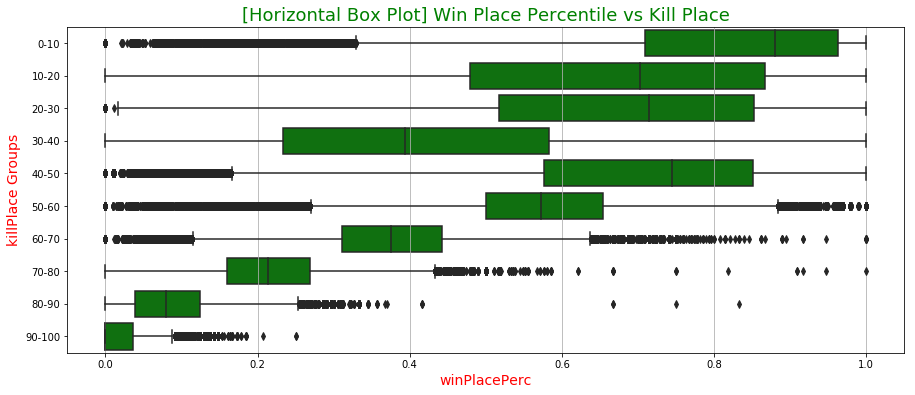

In [14]:
kill_place = pubg[['killPlace','winPlacePerc']].copy()

cut_range = np.linspace(0,100,11)

kill_place['killPlaceGroups'] = pd.cut(kill_place['killPlace'],
                                 cut_range,
                                 labels=["{0:.0f}-{1:.0f}".format(a_, b_) for a_, b_ in zip(cut_range[:11], cut_range[1:])],
                                 include_lowest=True
                                )

fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x="winPlacePerc", y="killPlaceGroups", data=kill_place, ax=ax, color="g")
ax.set_xlabel('winPlacePerc', size=14, color="r")
ax.set_ylabel('killPlace Groups', size=14, color="r")
ax.set_title('[Horizontal Box Plot] Win Place Percentile vs Kill Place', size=18, color="g")
plt.gca().xaxis.grid(True)
plt.show()